# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio 
import os
import cv2

import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle
#from sklearn.model_selection import train_test_split


## Define paths

In [2]:
train_path = 'Dataset/cars_train/'
test_path = 'Dataset/cars_test/'

In [3]:
cars_meta = sio.loadmat("devkit/cars_meta.mat")
cars_train_annos = sio.loadmat("devkit/cars_train_annos.mat")
cars_test_annos = sio.loadmat("devkit/cars_test_annos.mat")

## Load labels

In [4]:
def get_labels():
    labels = [c for c in cars_meta['class_names'][0]]
    labels = pd.DataFrame(labels, columns=['labels'])
    return labels

labels = get_labels()
labels.head(50)

,labels
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012
5,Acura Integra Type R 2001
6,Acura ZDX Hatchback 2012
7,Aston Martin V8 Vantage Convertible 2012
8,Aston Martin V8 Vantage Coupe 2012
9,Aston Martin Virage Convertible 2012


In [5]:
len(labels)

196

## Loading cars_train

In [6]:
def load_cars_train():
    frame = [[i.flat[0] for i in line] for line in cars_train_annos['annotations'][0]]
    columns = ['bbox_x1','bbox_y1','bbox_x2','bbox_y2', 'class', 'filename']
    df_train = pd.DataFrame(frame, columns=columns)
    df_train['class'] = df_train['class']-1
    return df_train

df_train = load_cars_train()
df_train.head(10)

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,filename
0,39,116,569,375,13,00001.jpg
1,36,116,868,587,2,00002.jpg
2,85,109,601,381,90,00003.jpg
3,621,393,1484,1096,133,00004.jpg
4,14,36,133,99,105,00005.jpg
5,259,289,515,416,122,00006.jpg
6,88,80,541,397,88,00007.jpg
7,73,79,591,410,95,00008.jpg
8,20,126,1269,771,166,00009.jpg
9,21,110,623,367,57,00010.jpg


## Merging labels

In [7]:
def merge_train_and_labels(df_train, labels):
    df_train = df_train.merge(labels, left_on='class', right_index=True)
    df_train = df_train.sort_index()
    return df_train
    
df_train = merge_train_and_labels(df_train, labels)
df_train.head(10)

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,filename,labels
0,39,116,569,375,13,00001.jpg,Audi TTS Coupe 2012
1,36,116,868,587,2,00002.jpg,Acura TL Sedan 2012
2,85,109,601,381,90,00003.jpg,Dodge Dakota Club Cab 2007
3,621,393,1484,1096,133,00004.jpg,Hyundai Sonata Hybrid Sedan 2012
4,14,36,133,99,105,00005.jpg,Ford F-450 Super Duty Crew Cab 2012
5,259,289,515,416,122,00006.jpg,Geo Metro Convertible 1993
6,88,80,541,397,88,00007.jpg,Dodge Journey SUV 2012
7,73,79,591,410,95,00008.jpg,Dodge Charger Sedan 2012
8,20,126,1269,771,166,00009.jpg,Mitsubishi Lancer Sedan 2012
9,21,110,623,367,57,00010.jpg,Chevrolet Traverse SUV 2012


In [8]:
# Change class to string
fn = df_train['filename']
lb = df_train['labels']
df = pd.DataFrame({'filename':fn, 'label':lb})


## Loading cars_test

In [9]:
def load_cars_test():
    frame = [[i.flat[0] for i in line] for line in cars_test_annos['annotations'][0]]
    columns = ['bbox_x1','bbox_y1','bbox_x2','bbox_y2', 'filename']
    df_test = pd.DataFrame(frame, columns=columns)
    return df_test

df_test = load_cars_test()
df_test.head(10)

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,filename
0,30,52,246,147,00001.jpg
1,100,19,576,203,00002.jpg
2,51,105,968,659,00003.jpg
3,67,84,581,407,00004.jpg
4,140,151,593,339,00005.jpg
5,20,77,420,301,00006.jpg
6,249,166,2324,1459,00007.jpg
7,119,215,1153,719,00008.jpg
8,1,7,275,183,00009.jpg
9,28,55,241,177,00010.jpg


## Cars' distribution

In [14]:
freq_labels = df_train.groupby('labels').count()[['class']]
freq_labels = freq_labels.rename(columns={'class': 'count'})
freq_labels = freq_labels.sort_values(by='count', ascending=False)
freq_labels.head(10)

,count
labels,
GMC Savana Van 2012,68
Chrysler 300 SRT-8 2010,49
Mercedes-Benz 300-Class Convertible 1993,48
Mitsubishi Lancer Sedan 2012,48
Jaguar XK XKR 2012,47
Chevrolet Corvette ZR1 2012,47
Audi S6 Sedan 2011,46
Volkswagen Golf Hatchback 1991,46
Ford GT Coupe 2006,46


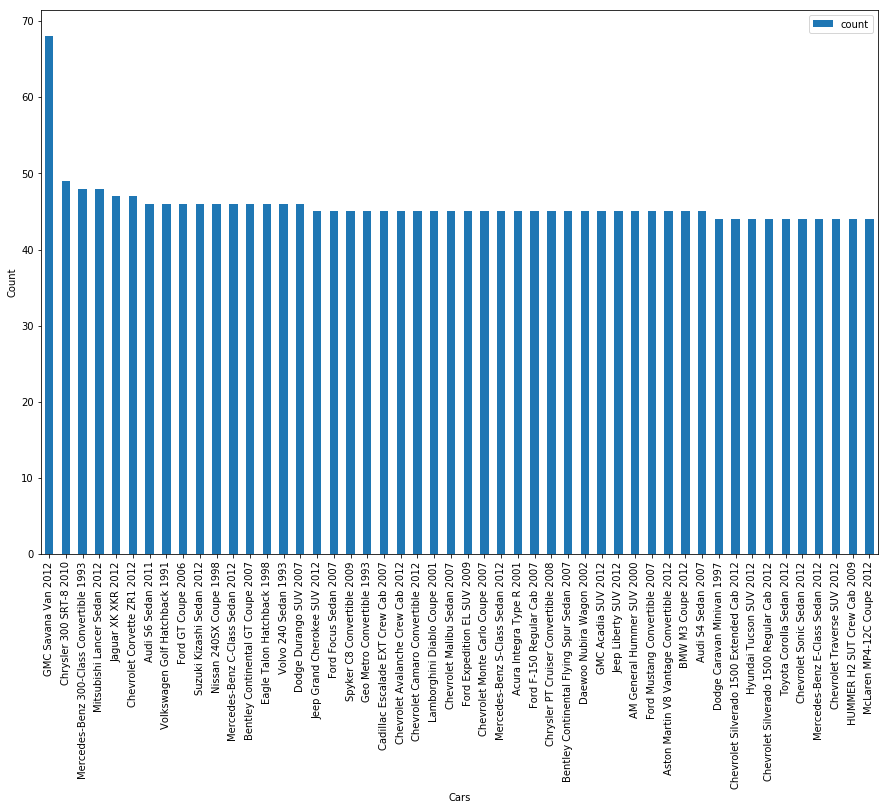

In [15]:
freq_labels.head(50).plot.bar(figsize=(15,10))
plt.xticks(rotation=90);
plt.xlabel("Cars");
plt.ylabel("Count");

## Display image

In [11]:
def get_assets(df,i):
    is_train = df is df_train
    folder = train_path if is_train else test_path
    image = Image.open(folder+df['filename'][i])
    title = df['labels'][i] if is_train else 'Unclassified'
    
    xy = df['bbox_x1'][i], df['bbox_y1'][i]
    width = df['bbox_x2'][i] - df['bbox_x1'][i]
    height = df['bbox_y2'][i] - df['bbox_y1'][i]
    rect = Rectangle(xy, width, height, fill=False, color='r', linewidth=2)
    
    return (image, title, rect)

def display_image(df, i):
    image, title, rect = get_assets(df,i)
    print(title)
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.gca().add_patch(rect)

Audi TTS Coupe 2012


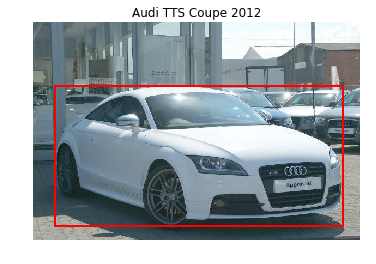

In [12]:
display_image(df_train,0)

## Display image in the bbox

Audi TTS Coupe 2012


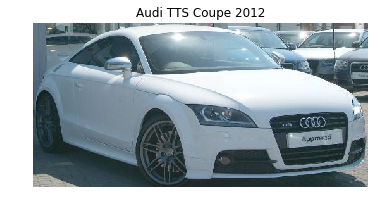

In [13]:
def get_assets_2(df,i):
    is_train = df is df_train
    folder = train_path if is_train else test_path
    image = Image.open(folder+df['filename'][i])
    title = df['labels'][i] if is_train else 'Unclassified'
    area = (df['bbox_x1'][i], df['bbox_y1'][i],  df['bbox_x2'][i], df['bbox_y2'][i])
    return (image, title, area)

def display_image_in_bbox(df, i):
    image, title, area = get_assets_2(df,i)
    print(title)
    cropped_img = image.crop(area)
    plt.imshow(cropped_img)
    plt.axis('off')
    plt.title(title)
    
display_image_in_bbox(df_train,0)

## Save image in the bbox
#### Reduce noise from picture.<br>With this, the model will see only car and ignore the background

In [14]:
new_train_path = 'Dataset/new_cars_train/'
new_test_path = 'Dataset/new_cars_test/'

### Save image according its label in a folder.
E.g. 0001.jpg is a 'Audi TTS Coupe 2012'<br>
     13 represent 'Audi TTS Coupe 2012'<br>
     Therefor 0001.jpg is saved to a folder named '13' as '0.jpg'

In [ ]:
def label_to_num(title,label_list):
    index = 0
    for i in range(len(label_list)):
        if label_list['labels'].loc[i] == title:
            index = i
    return index

def save_image_in_bbox(df, labels):
    for i in range(len(df)):
        image, title, area = get_assets_2(df,i)
        title = label_to_num(title, labels)
        cropped_img = image.crop(area)
        try:
            cropped_img.save(new_train_path+str(title)+"/"+str(i)+".jpg")
        except:
            os.makedirs(new_train_path+str(title)) 
            cropped_img.save(new_train_path+str(title)+"/"+str(i)+".jpg")

save_image_in_bbox(df_train, labels)